In [16]:
import numpy as np
import torch
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import display
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader,TensorDataset


In [25]:
iris=sns.load_dataset('iris')
data=torch.tensor(iris[iris.columns[0:4]].values).float()
labels=torch.zeros(len(data),dtype=torch.long)
labels[iris.species=='versicolor']=1
labels[iris.species=='virginica']=2



In [9]:
fakedata=np.tile(np.array([1,2,3,4]),(10,1))+np.tile(10*np.arange(1,11),(4,1)).T
fakelabels=np.arange(10)>4
print(fakedata)
print()
print(fakelabels)

[[ 11  12  13  14]
 [ 21  22  23  24]
 [ 31  32  33  34]
 [ 41  42  43  44]
 [ 51  52  53  54]
 [ 61  62  63  64]
 [ 71  72  73  74]
 [ 81  82  83  84]
 [ 91  92  93  94]
 [101 102 103 104]]

[False False False False False  True  True  True  True  True]


In [11]:
fakedataLdr=DataLoader(fakedata,shuffle=True)
print(fakedataLdr)
print(fakedataLdr.batch_size)

1


In [12]:
for i,onesample in enumerate(fakedataLdr):
    print(i,onesample,onesample.shape)

0 tensor([[81, 82, 83, 84]]) torch.Size([1, 4])
1 tensor([[21, 22, 23, 24]]) torch.Size([1, 4])
2 tensor([[71, 72, 73, 74]]) torch.Size([1, 4])
3 tensor([[51, 52, 53, 54]]) torch.Size([1, 4])
4 tensor([[101, 102, 103, 104]]) torch.Size([1, 4])
5 tensor([[11, 12, 13, 14]]) torch.Size([1, 4])
6 tensor([[61, 62, 63, 64]]) torch.Size([1, 4])
7 tensor([[91, 92, 93, 94]]) torch.Size([1, 4])
8 tensor([[31, 32, 33, 34]]) torch.Size([1, 4])
9 tensor([[41, 42, 43, 44]]) torch.Size([1, 4])


In [15]:
fakeDataset=torch.utils.data.TensorDataset(torch.Tensor(fakedata),torch.Tensor(fakelabels))
print(fakeDataset.tensors)
print()
fakedataLdr=DataLoader(fakeDataset,shuffle=True)
for data,label in fakedataLdr:
    print(data,label)

(tensor([[ 11.,  12.,  13.,  14.],
        [ 21.,  22.,  23.,  24.],
        [ 31.,  32.,  33.,  34.],
        [ 41.,  42.,  43.,  44.],
        [ 51.,  52.,  53.,  54.],
        [ 61.,  62.,  63.,  64.],
        [ 71.,  72.,  73.,  74.],
        [ 81.,  82.,  83.,  84.],
        [ 91.,  92.,  93.,  94.],
        [101., 102., 103., 104.]]), tensor([0., 0., 0., 0., 0., 1., 1., 1., 1., 1.]))

tensor([[81., 82., 83., 84.]]) tensor([1.])
tensor([[61., 62., 63., 64.]]) tensor([1.])
tensor([[21., 22., 23., 24.]]) tensor([0.])
tensor([[51., 52., 53., 54.]]) tensor([0.])
tensor([[71., 72., 73., 74.]]) tensor([1.])
tensor([[101., 102., 103., 104.]]) tensor([1.])
tensor([[11., 12., 13., 14.]]) tensor([0.])
tensor([[41., 42., 43., 44.]]) tensor([0.])
tensor([[31., 32., 33., 34.]]) tensor([0.])
tensor([[91., 92., 93., 94.]]) tensor([1.])


In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    fakedata, fakelabels, test_size=0.2, random_state=42)
train_data=TensorDataset(torch.Tensor(X_train),torch.Tensor(y_train))
test_data=TensorDataset(torch.Tensor(X_test),torch.Tensor(y_test))
trainldr=DataLoader(train_data,batch_size=4)
testldr=DataLoader(test_data)

In [22]:
print('TRAINING DATA:')
for batch,y in trainldr:
    print(batch,y)
    print()
print('TEST DATA:')
for batch,y in testldr:
    print(batch,y)
    print()


TRAINING DATA:
tensor([[61., 62., 63., 64.],
        [11., 12., 13., 14.],
        [81., 82., 83., 84.],
        [31., 32., 33., 34.]]) tensor([1., 0., 1., 0.])

tensor([[101., 102., 103., 104.],
        [ 51.,  52.,  53.,  54.],
        [ 41.,  42.,  43.,  44.],
        [ 71.,  72.,  73.,  74.]]) tensor([1., 0., 0., 1.])

TEST DATA:
tensor([[91., 92., 93., 94.]]) tensor([1.])

tensor([[21., 22., 23., 24.]]) tensor([0.])



In [34]:
X_train, X_test, y_train, y_test = train_test_split(
    data, labels, test_size=0.2, random_state=42)
train_data=TensorDataset(X_train,y_train)
test_data=TensorDataset(X_test,y_test)
trainldr=DataLoader(train_data,shuffle=True,batch_size=12)
testldr=DataLoader(test_data,batch_size=test_data.tensors[0].shape[0])
for X,y in trainldr:
    print(X.shape,y.shape)
X,y

torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])


(tensor([[6.3000, 2.5000, 4.9000, 1.5000],
         [5.7000, 3.0000, 4.2000, 1.2000],
         [4.9000, 2.4000, 3.3000, 1.0000],
         [5.6000, 2.8000, 4.9000, 2.0000],
         [5.0000, 3.0000, 1.6000, 0.2000],
         [7.0000, 3.2000, 4.7000, 1.4000],
         [5.4000, 3.9000, 1.3000, 0.4000],
         [5.5000, 2.3000, 4.0000, 1.3000],
         [5.7000, 2.9000, 4.2000, 1.3000],
         [4.9000, 3.6000, 1.4000, 0.1000],
         [5.9000, 3.0000, 4.2000, 1.5000],
         [6.5000, 3.0000, 5.2000, 2.0000]]),
 tensor([1, 1, 1, 2, 0, 1, 0, 1, 1, 0, 1, 2]))

In [35]:
for X,y in testldr:
    print(X.shape,y.shape)

torch.Size([30, 4]) torch.Size([30])


In [36]:
 def createANNmodel():
    ANNiris=nn.Sequential(nn.Linear(4,64),
                         nn.ReLU(),
                         nn.Linear(64,64),
                         nn.ReLU(),
                         nn.Linear(64,3),)
    lossfun=nn.CrossEntropyLoss()
    optimizer=torch.optim.SGD(ANNiris.parameters(),lr=0.01)
    return ANNiris,lossfun,optimizer

In [39]:

numepoches=500
def trainTheModel():
    losses=torch.zeros(numepoches)
    trainAcc=[]
    testAcc=[]
  
    for epochi in range(numepoches):
        batchAcc=[]
        for X,y in trainldr:
        
            yHat=ANNiris(X)

            loss=lossfun(yHat,y)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            batchAcc.append(100*torch.mean((torch.argmax(yHat,axis=1)==y).float()).item())
        

        trainAcc.append(np.mean(batchAcc))
        X,y=next(iter(testldr))
        predlabels=torch.argmax(ANNiris(X),axis=1)
        testAcc.append(100*torch.mean((predlabels==y).float()).item())
    
    return trainAcc,testAcc


In [40]:
ANNiris,lossfun,optimizer=createANNmodel()
trainAcc,testAcc=trainTheModel()


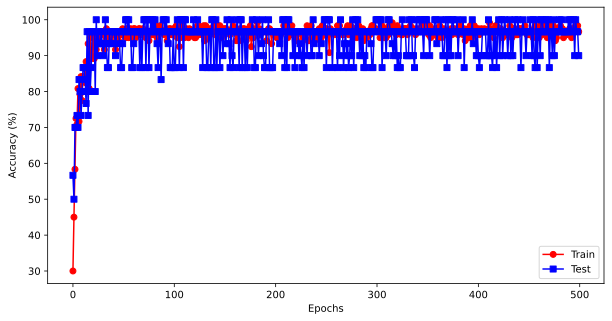

In [42]:
fig=plt.figure(figsize=(10,5))
plt.plot(trainAcc,'ro-')
plt.plot(testAcc,'bs-')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend(['Train','Test'])